# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def res_norm(A, x, b):
    return np.linalg.norm(b - A @ x)

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [3]:
import main_6
N = 10
#a)
A1, b1 = main_6.random_matrix_Ab(N)

#b)
A2, b2 = main.diag_dominant_matrix_A_b(N)

#c)
A3, b3 = main.symmetric_matrix_A_b(N)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [4]:
import timeit
from scipy.sparse.linalg import gmres

#Metoda solve
x1 = np.linalg.solve(A1, b1)

#solve_jacobi
if main.is_diag_dominant(A1):
    print("Można")
else:
    print("Nie można zastosować metody solve_jacobi")
    
#Metoda gradientów sprzężonych
if main.is_symmetric(A1): 
    print("Można zastosowac")
else:
    print("Nie można zastosować metody gradientów sprzężonych")
    
#Metoda GMRES
x4, _ = gmres(A1, b1)

Nie można zastosować metody solve_jacobi
Nie można zastosować metody gradientów sprzężonych


In [5]:
saved_timing_1 = %timeit -r 5 -n 10 -o np.linalg.solve(A1, b1)

print(f'Dokładność funkcji solve: {res_norm(A1, x1, b1)}')

69.9 µs ± 23.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Dokładność funkcji solve: 8.070964826992553e-12


574 µs ± 220 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
451 µs ± 91 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
331 µs ± 90 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
290 µs ± 9.72 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
376 µs ± 54.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
375 µs ± 107 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
301 µs ± 11.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
361 µs ± 67.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
385 µs ± 92.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
326 µs ± 37.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


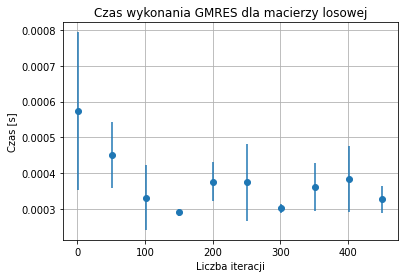

In [15]:
N = 500
time = []
mistake = []
x = []
for i in range(1, N, 50):
    x.append(i)
    saved_timing_4 = %timeit -r 5 -n 10 -o gmres(A1, b1, maxiter=i)
    time.append(saved_timing_4.average)
    mistake.append(saved_timing_4.stdev)
    
plt.errorbar(x, time, yerr=mistake, marker='o',linestyle="None")
plt.grid()
plt.xlabel('Liczba iteracji'), plt.ylabel('Czas [s]')
plt.title('Czas wykonania GMRES dla macierzy losowej')
plt.show()

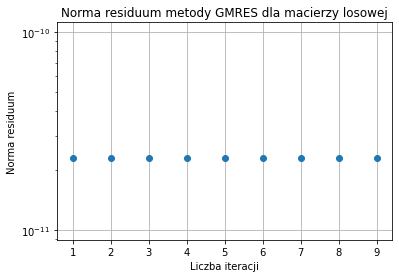

In [61]:
N = 10
norm = []
x = []
for i in range(1, N):
    x.append(i)
    x4, _ = gmres(A1, b1, maxiter=i)
    norm.append(res_norm(A1, x4, b1))
    
plt.plot(x, norm, 'o')
plt.grid()
plt.yscale('log')
plt.xlabel('Liczba iteracji')
plt.ylabel('Norma residuum')
plt.title('Norma residuum metody GMRES dla macierzy losowej')
plt.show()

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [22]:
#Metoda solve
x_1 = np.linalg.solve(A2, b2)

#solve_jacobi
if main.is_diag_dominant(A2):
    x2, _ = main.solve_jacobi(A2, b2, np.zeros(10,))
else:
    print("Nie można wykonać metody solve_jacobi")

#Metoda gradientów sprzężonych
if main.is_symmetric(A2): 
    print("Można zastosowac")
else:
    print("Nie można zastosować metody gradientów sprzężonych")
    
#Metoda GMRES
x4, _ = gmres(A2, b2)

Nie można zastosować metody gradientów sprzężonych


In [23]:
saved_timing_1 = %timeit -r 5 -n 10 -o np.linalg.solve(A2, b2)
print('\n')

print(f'Dokładność funkcji solve: {res_norm(A2, x_1, b2)}')

54.3 µs ± 12 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Dokładność funkcji solve: 2.0947646134062088e-15


96.4 µs ± 26.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
338 µs ± 84 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
428 µs ± 29.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
688 µs ± 150 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
826 µs ± 65.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.16 ms ± 257 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.31 ms ± 282 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.3 ms ± 29.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.96 ms ± 321 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.21 ms ± 565 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


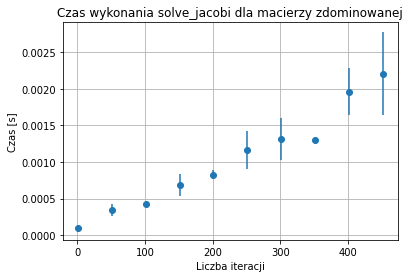

In [24]:
N = 500
time = []
mistake = []
x = []
norm = []
for i in range(1, N, 50):
    x.append(i)
    saved_timing_4 = %timeit -r 5 -n 10 -o main.solve_jacobi(A2, b2, np.zeros(10,), maxiter=i)
    time.append(saved_timing_4.average)
    mistake.append(saved_timing_4.stdev)
    
plt.errorbar(x, time, yerr=mistake, marker='o',linestyle="None")
plt.grid()
plt.xlabel('Liczba iteracji'), plt.ylabel('Czas [s]')
plt.title('Czas wykonania solve_jacobi dla macierzy zdominowanej')
plt.show()

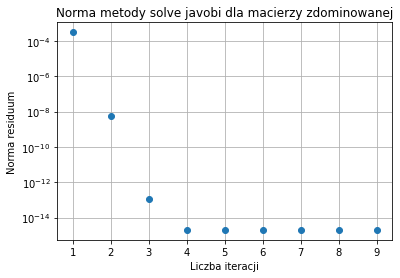

In [62]:
N = 10
norm = []
x = []
for i in range(1, N):
    x.append(i)
    x2, _ = main.solve_jacobi(A2, b2, np.zeros(10,), maxiter=i)
    norm.append(res_norm(A2, x2, b2))
    
plt.plot(x, norm, 'o')
plt.grid()
plt.yscale('log')
plt.xlabel('Liczba iteracji')
plt.ylabel('Norma residuum')
plt.title('Norma metody solve javobi dla macierzy zdominowanej')
plt.show()

381 µs ± 75.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
211 µs ± 26.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
The slowest run took 5.10 times longer than the fastest. This could mean that an intermediate result is being cached.
303 µs ± 247 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
228 µs ± 130 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
213 µs ± 54.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
154 µs ± 5.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
179 µs ± 52 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
171 µs ± 17.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
157 µs ± 6.36 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
166 µs ± 12.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


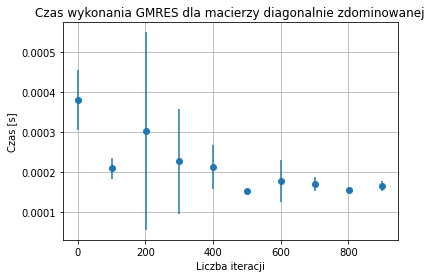

In [14]:
N = 1000
time = []
mistake = []
x = []
norm = []
for i in range(1, N, 100):
    x.append(i)
    saved_timing_4 = %timeit -r 5 -n 10 -o gmres(A2, b2, maxiter=i)
    time.append(saved_timing_4.average)
    mistake.append(saved_timing_4.stdev)
    
plt.errorbar(x, time, yerr=mistake, marker='o',linestyle="None")
plt.grid()
plt.xlabel('Liczba iteracji'), plt.ylabel('Czas [s]')
plt.title('Czas wykonania GMRES dla macierzy diagonalnie zdominowanej')
plt.show()

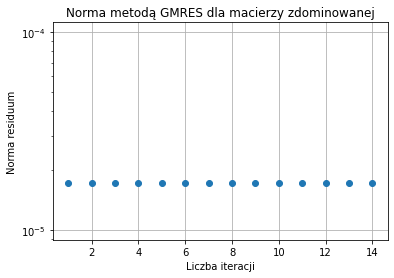

In [63]:
N =15
norm = []
x = []
for i in range(1, N):
    x.append(i)
    x4, _ = gmres(A2, b2, maxiter=i)
    norm.append(res_norm(A2, x4, b2))
    
plt.plot(x, norm, 'o')
plt.grid()
plt.yscale('log')
plt.xlabel('Liczba iteracji')
plt.ylabel('Norma residuum')
plt.title('Norma metodą GMRES dla macierzy zdominowanej')
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [20]:
#solve numpy
x__1 = np.linalg.solve(A3, b3)

#solve_jacobi
if main.is_diag_dominant(A3):
    x2, _ = main.solve_jacobi(A3, b3, np.zeros(10,))
else:
    print("Nie można wykonać metody solve_jacobi")

if main.is_symmetric(A3): 
    x3, _ = sp.sparse.linalg.cg(A3, b3)
else:
    print("Nie można zastosować metody gradientów sprzężonych")
#Metoda GMRES
x4, _ = gmres(A3, b3)

Nie można wykonać metody solve_jacobi


In [21]:
saved_timing_1 = %timeit -r 5 -n 10 -o np.linalg.solve(A3, b3)
print('\n')

print(f'Dokładność funkcji solve: {res_norm(A3, x__1, b3)}')

75.1 µs ± 11.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Dokładność funkcji solve: 4.757146962048553e-15


198 µs ± 27.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
501 µs ± 160 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
415 µs ± 128 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
393 µs ± 103 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
401 µs ± 64.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
339 µs ± 32.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
337 µs ± 44.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
312 µs ± 8.24 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
468 µs ± 134 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
417 µs ± 44.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


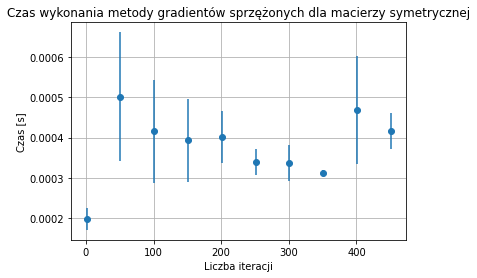

In [25]:
N = 500
time = []
mistake = []
x = []
norm = []
for i in range(1, N, 50):
    x.append(i)
    saved_timing_4 = %timeit -r 5 -n 10 -o sp.sparse.linalg.cg(A3, b3, maxiter=i)
    time.append(saved_timing_4.average)
    mistake.append(saved_timing_4.stdev)
    
plt.errorbar(x, time, yerr=mistake, marker='o',linestyle="None")
plt.grid()
plt.xlabel('Liczba iteracji'), plt.ylabel('Czas [s]')
plt.title('Czas wykonania metody gradientów sprzężonych dla macierzy symetrycznej')
plt.show()

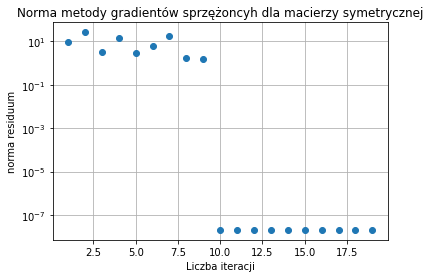

In [64]:
N = 20
norm = []
x = []
for i in range(1, N):
    x.append(i)
    x3, _ = sp.sparse.linalg.cg(A3, b3, maxiter=i)
    norm.append(res_norm(A3, x3, b3))
    
plt.plot(x, norm, 'o')
plt.grid()
plt.yscale('log')
plt.xlabel('Liczba iteracji')
plt.ylabel('norma residuum')
plt.title('Norma metody gradientów sprzężoncyh dla macierzy symetrycznej')
plt.show()

571 µs ± 112 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
422 µs ± 111 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
275 µs ± 9.09 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
284 µs ± 15.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
295 µs ± 39.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
291 µs ± 37.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
396 µs ± 139 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
340 µs ± 25.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
319 µs ± 18.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
321 µs ± 12.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


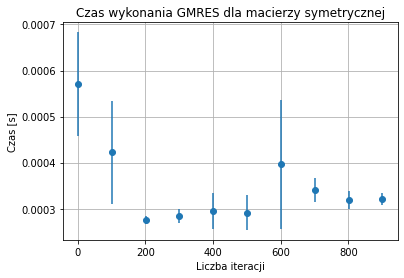

In [32]:
N = 1000
time = []
mistake = []
x = []
norm = []
for i in range(1, N, 100):
    x.append(i)
    saved_timing_4 = %timeit -r 5 -n 10 -o gmres(A3, b3, maxiter=i)
    time.append(saved_timing_4.average)
    mistake.append(saved_timing_4.stdev)
    
plt.errorbar(x, time, yerr=mistake, marker='o',linestyle="None")
plt.grid()
plt.xlabel('Liczba iteracji'), plt.ylabel('Czas [s]')
plt.title('Czas wykonania GMRES dla macierzy symetrycznej')
plt.show()

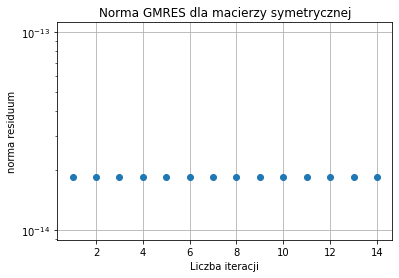

In [65]:
N = 15
norm = []
x = []
for i in range(1, N):
    x.append(i)
    x4, _ = gmres(A3, b3, maxiter=i)
    norm.append(res_norm(A3, x4, b3))
    
plt.plot(x, norm, 'o')
plt.grid()
plt.yscale('log')
plt.xlabel('Liczba iteracji')
plt.ylabel('norma residuum')
plt.title('Norma GMRES dla macierzy symetrycznej')
plt.show()

Wnioski:
Ze wszystkich funkcji możemy zauważyć, że najszybciej wykonuje się wbudowana funkcja solve. 
Czas wykonania napisanej funkcji solve_jacobi rośnie wraz z każdą iteracją, a norma residuum już po 4 interacjach spada do zera maszynowego. Co do metody GMRES lub gradientów sprzężonych to są nieco wolniejsze i mniej wydajne.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)